<a href="https://colab.research.google.com/github/apogon/apogon.github.io/blob/main/CIP_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estados**



In [ ]:
# Importar las librerías
import numpy as np
import math
import random

T = 1
A = 0.374

def htanque(h_k, Qe_k, Qs_k):
  return T/A*(Qe_k - Qs_k) + h_k

def Qo(Qo_k, Qi_k, tau, Qteta):
  return Qo_k + (T/tau)*(Qi_k-Qteta-Qo_k)


**Espacio de Estados**

In [ ]:
import numpy as np
estados = []
Y=0.0
for k in range(96):
  Y=round(Y,2)
  estados.append(Y)
  Y=Y+0.02
print(estados)

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.88, 1.9]


**Espacio de Acciones**

El rango de operación estimado es entre el 80% y 100%

In [ ]:
#acciones = []
Q1 = []
Q2 = []
DeltaT = []
Q = 80.0
T1 = 1
for k in range(21):
  Q = round(Q,1)
  Q1.append(Q)
  Q2.append(Q)
  Q = Q+1

for k in range(20):
  DeltaT.append(T1)
  T1 = T1+1
print(Q1)
print(DeltaT)


[80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


**Recompensas**

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.6400000000000001, 1.6600000000000001, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.8800000000000001, 1.9000000000000001]


Text(0.5, 1.0, 'Reward vs. Altura (Tanque)')

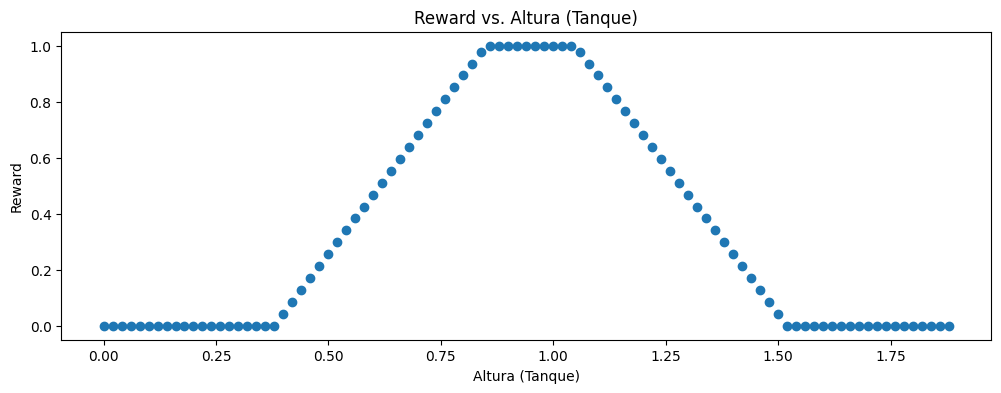

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definición de las recompensas
def reward(h):
        if ((h >= 0.85) and (h <= 1.05)):
            return 1.0
        if ((h > 0.38) and (h < 0.85)):
            return 2.128*h - 0.80864
        if ((h > 1.05) and (h < 1.52)):
            return -2.128*h + 3.23456
        if ((h >= 0) and (h <= 0.38)):
            return 0
        if ((h >=1.52) and (h <= 1.9)):
            return 0

h = [(x * 0.02) for x in range(96)]
print(h)
R = [reward(x) for x in h]
fig=plt.figure(figsize=(12, 4))

plt.scatter(h, R)
plt.xlabel('Altura (Tanque)')
plt.ylabel('Reward')
plt.title('Reward vs. Altura (Tanque)')


In [ ]:
def Ambiente(Qo_k, Qi_k, tau, Qteta, h_k):
  Qo_k_1 = Qo(Qo_k, Qi_k, tau, Qteta)
  Qe_k = Qo_k_1
  Qs_k = Qi_k
  h_k_1 = htanque(h_k, Qe_k, Qs_k)
  Ri_1=reward(h_k_1)
  return h_k_1,Ri_1


In [ ]:
# Configuración de los parámetros gamma y alfa para el Q-Learning
gamma = 0.75
alpha = 0.9
# Inicialización de los valores Q
Q = np.array(np.zeros([96,62]))


In [ ]:
# Implementación del proceso de Q-Learning
for i in range(10000):
    tau = np.random.randint(0,100)
    teta = np.random.randint(0,100)
    for i in range(10000):
      indice_h_k = np.random.randint(0,96)
      indice_Qi_k = np.random.randint(0,101)
      indice_Qo_k = np.random.randint(0,101)
      Qi_k = acciones[indice_Qi_k]
      Qo_k = acciones[indice_Qo_k]
      for i in range(1000):
        if ((i >= 0) and (i <= teta)):
          Qteta = Qi_k
        else:
          Qteta = 0
        h_k_1,Ri_1 = Ambiente(Qo_k, Qi_k, tau, Qteta, estados[indice_h_k])
        indice_h_k_1 =  estados.index(round(h_k_1,1))
        TD = Ri_1 + gamma*Q[indice_h_k_1, np.argmax(Q[indice_h_k_1,])]- Q[indice_h_k, Qi_k]
        Q[indice_h_k, indice_Qi_k] = Q[indice_h_k, indice_Qi_k] + alpha*TD

Podemos echarle un vistazo ejecutando todo el código que hemos implementado hasta ahora e ingresando las siguientes dos instrucciones en la consola:

In [ ]:
print("Q-Values:")
print(Q)

Q-Values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
temp=30

In [ ]:
def dinamica():
  global temp
  print(temp)
  estado_act =  estados.index(round(temp,1))
  print(estado_act)
  print(Q[estado_act,])
  acc_sig = np.argmax(Q[estado_act,])
  temp = respond(acciones[acc_sig], temp, tau)
  print(acc_sig)
  print(acciones[acc_sig])



In [ ]:
dinamica()

16.26077922626466


ValueError: 16.3 is not in list

In [ ]:
# Hacer la función final que devolverá la ruta óptima
def ruta(inicio, fin):
    ruta = [inicio]
    siguiente = inicio
    while (siguiente != fin):
        estado_inicial = def_de_estados[inicio]
        siguiente = np.argmax(Q[estado_inicial,])
        siguiente = mapeo_de_estados[siguiente]
        ruta.append(siguiente)
        inicio = siguiente
    return ruta

Probar la ruta para ir de E a G.

**Tarea 2**

1. Comente el programa completo y de una descripción del problema resuelto con el método de Q-Learning.
2. Para tener un algoritmo funcional, cómo debería configurar la matriz de recompensas para ir por una ruta óptima por ejemplo desde E a G.
3. Pruebe con diferentes valores de gamma y alpha y comente los resultados obtenidos.
4. Como obtener una ruta que obligue a pasar por una ruta intermedia ?.
5. Comente claramente la función ruta(inicio, fin).
6. Comente como funciona np.argmax(Q[estado_inicial,]), que esta devolviendo en cada ejecución.
7. Construir igualmente un archivo .ipynb con la versión desarrollada por cada uno de Uds., asignarle valores a la matriz de recompensas de acuerdo a rutas que Uds., establecieron y comentar los resultados.
8. El reporte final se debe subir al classroom de la materia

**Tarea 3**

Explicar el código de la mejora 1 (código anterior). Ejecutar diferentes opciones de ruta y concluir sobre la respuesta generado por el algoritmo. Para los códigos que han venido implementando (16 estados) y con un ambiente 4x5, implementar esta mejora. Crear un reporte y subirlo al classroom de la clase.

**Tarea 4**

Como en la tarea anterior, explicar el codigo de la función mejor_ruta(). Adecuar la matriz de recompensas de acuerdo a la idea de evitar pasar por algunos sitios y también optimizando o privilegiando el paso por otros sitios, para ésto que modfificaciones hay que realizar, explicar claramente porque ?. Finalizar los dos códigos que han venido realizando y crear un reporte completo de este ejercicio y subirlos al classroom de la clase.